Report: correlation between language proficiency and employment rates among migrants in Leipzig

Contents :

Introduction
Data Source
Installation of dependencies
Loading Data
Answering broad questions
Question 1 and Inference 1
Conclusion
Questions for further research

Introduction:

This project aims to investigate the relationship between language proficiency and employment trends among migrants in Leipzig, Germany. Our primary goal is to understand how migrants' language skills influence their ability to secure jobs and integrate into the local workforce.

The motivation behind this project stems from the importance of fostering inclusive and equitable employment opportunities for migrants, a segment of the population often facing unique challenges in the labor market. We want to contribute to evidence-based policy decisions and support programs that promote successful integration.

Datasources:

Datasource1: Employment of migrants
Metadata URL: https://mobilithek.info/offers/-6901989592576801458
Data URL: https://opendata.leipzig.de/dataset/ac13f1cd-1515-47df-bc6f-ec18ae325918/resource/10e95615-f843-4b9f-8712-60e7be53eb5f/download/abb9erwerbstatigkeitmigratinnen.csv
Data Type: CSV
Description: This overview provides an overview of the proportion of Leipzig migrants who are employed. The data is grouped by gender and country of origin and was collected as part of the 2020 migrant survey.

Datasource2: Language understanding of migrants
Metadata URL: https://www.govdata.de/ckan/dataset/sprachverstandnis-migrantinnen.rdf
Data URL: https://opendata.leipzig.de/dataset/126ea2a3-38f4-410d-91fe-c683558c99cd/resource/c269e8b9-9adf-4202-ad15-14317a505691/download/abb8sprachverstandnis.csv
Data Type: CSV
Description: The data collection provides an overview of the language understanding of Leipzig migrants in relation to the German language (self-assessment), grouped by country of origin and gender. The percentage of respondents who stated that they understood the German language “very well” or “well” is listed.

In [174]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploring data in employment_data_transformed:

Exploring data in language_data_transformed:



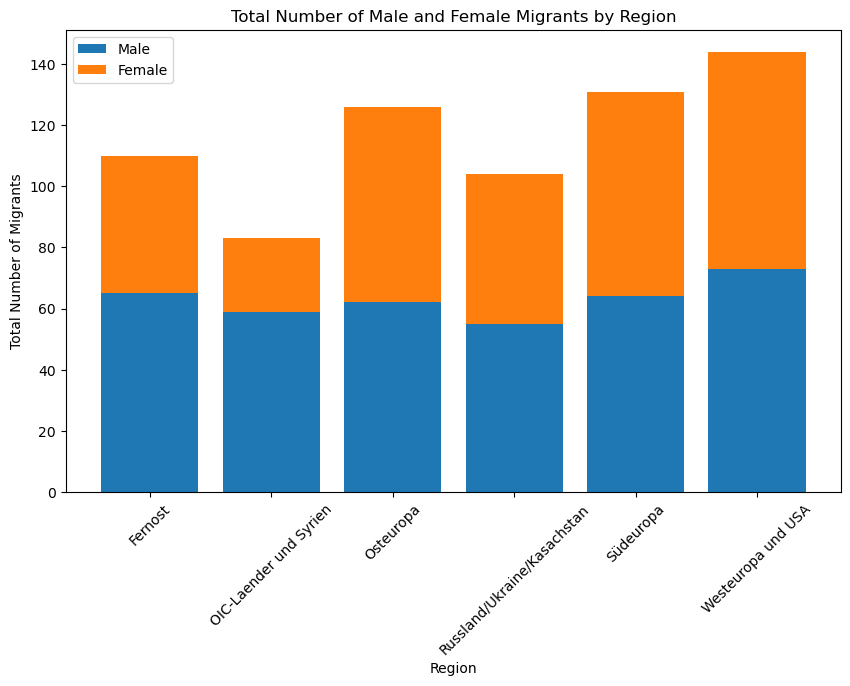

In [192]:
# Connect to the SQLite database
database_path = 'data'
conn1 = sqlite3.connect(r'C:\Users\49157\PycharmProjects\made-template\project\data\employment_data_transformed.db')
table_name1 = 'employment_data_transformed'
print(f"Exploring data in {table_name1}:\n")
query1 = f"SELECT * FROM `{table_name1}`;"
employment_data = pd.read_sql_query(query1, conn1)


conn2 = sqlite3.connect(r'C:\Users\49157\PycharmProjects\made-template\project\data\language_data_transformed.db')
# Query data from the tables in each database
table_name2 = 'language_data_transformed'
# Query data from the table
print(f"Exploring data in {table_name2}:\n")
query2 = f"SELECT * FROM `{table_name2}`;"
language_data = pd.read_sql_query(query2, conn2)

# Assuming you have a dataframe named 'migration_data' with columns 'Region', 'Male', and 'Female'
# Grouping and Aggregating
migrants_by_region = employment_data.groupby('Region')[['Male', 'Female']].sum()

# Visualization as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(migrants_by_region.index, migrants_by_region['Male'], label='Male')
plt.bar(migrants_by_region.index, migrants_by_region['Female'], bottom=migrants_by_region['Male'], label='Female')
plt.xlabel('Region')
plt.ylabel('Total Number of Migrants')
plt.title('Total Number of Male and Female Migrants by Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Question 1: What is the correlation between the language proficiency of male and female migrants and their employment rates in Leipzig?


In [216]:
# Merge datasets on a common key (assuming 'Gebiet' is common between the datasets)
merged_data = pd.merge(language_data, employment_data, on='Region', how='inner')

# Calculate the correlation between language proficiency of men and employment rates of men
correlation = merged_data['German_understanding_male'].corr(merged_data['Male'])
print(f"The correlation between language proficiency of men and employment rates is: {correlation}")

# Calculate the correlation between language proficiency of women and employment rates of women
correlation = merged_data['German_understanding_female'].corr(merged_data['Female'])
print(f"The correlation between language proficiency of women and employment rates is: {correlation}")


The correlation between language proficiency of men and employment rates is: 0.6254401704972342
The correlation between language proficiency of women and employment rates is: 0.9466444642277179


Inference 1:
The heatmap above illustrates the correlation between language proficiency and employment rates among male and female migrants. It indicates the strength and direction of the relationships. A positive correlation suggests that as language proficiency increases, employment rates also tend to increase.

Question 2: How do language proficiency levels vary across different regions in Leipzig for both males and females?

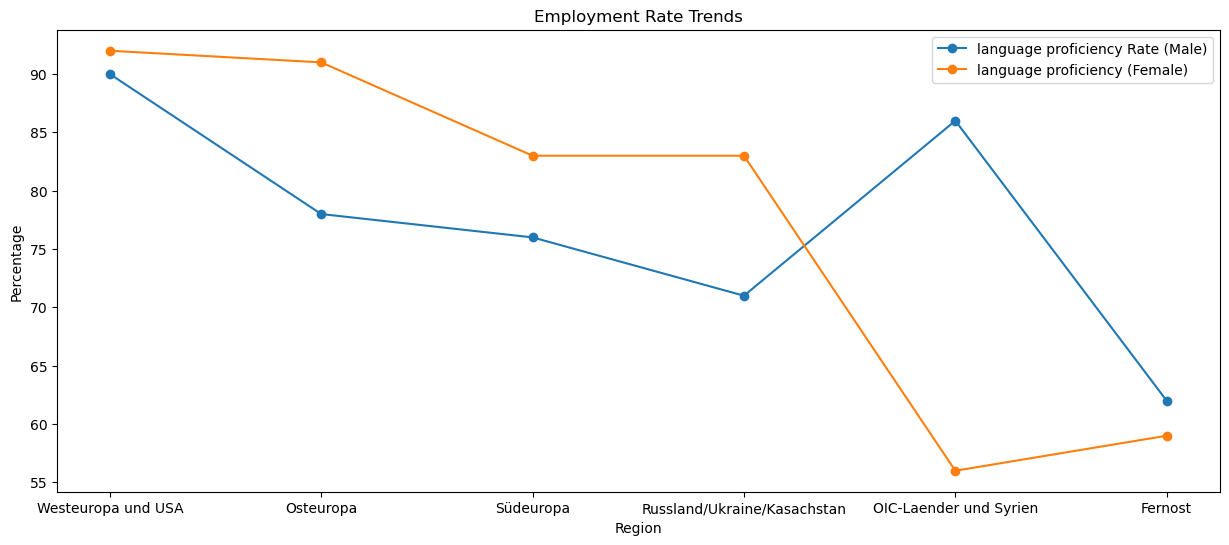

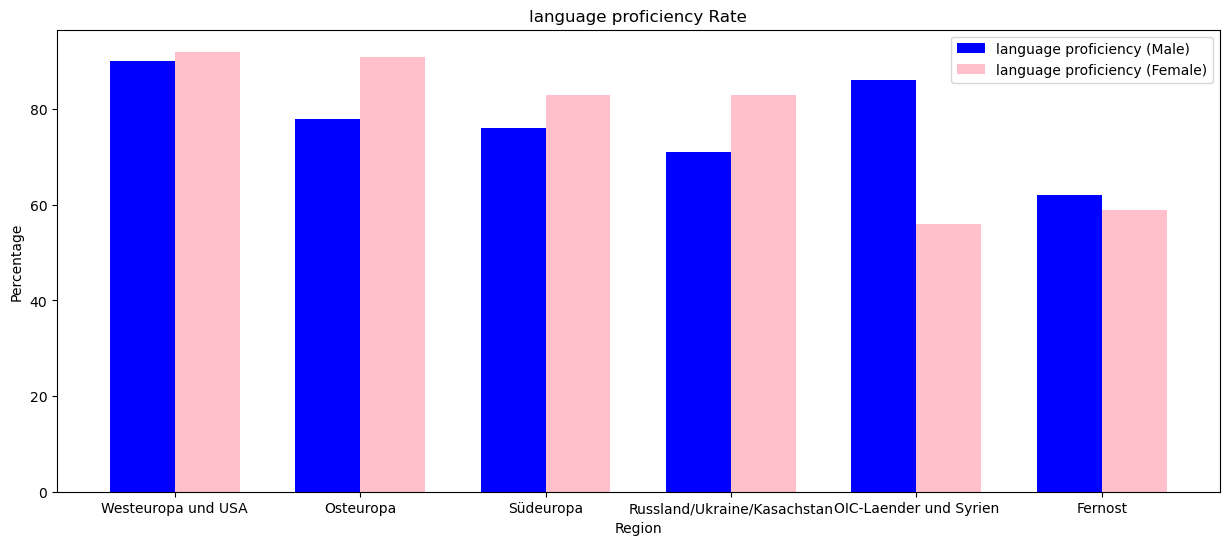

In [215]:
# Create a line plot to show the trends in language proficiency rates over different regions
plt.figure(figsize=(15, 6))
plt.plot(employment_data['Region'], language_data['German_understanding_male'],label='language proficiency Rate (Male)', marker= 'o')
plt.plot(employment_data['Region'], language_data['German_understanding_female'],label='language proficiency (Female)', marker= 'o')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Employment Rate Trends')
plt.legend()
plt.show()

# Create a bar chart to show the trends in employment rates over different regions
plt.figure(figsize=(15, 6))
bar_width = 0.35

# Calculate positions for the bars
bar_positions_male = range(len(employment_data['Region']))
bar_positions_female = [pos + bar_width for pos in bar_positions_male]

# Plot bars for male and female employment rates
plt.bar(bar_positions_male, language_data['German_understanding_male'], label='language proficiency (Male)', width=bar_width, color='blue')
plt.bar(bar_positions_female, language_data['German_understanding_female'], label='language proficiency (Female)', width=bar_width, color='pink')

# Set axis labels and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('language proficiency Rate')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_male], employment_data['Region'])
plt.legend()
plt.show()


Inference 2:
The bar plots above provide an overview of how language proficiency levels vary across different regions in Leipzig for both males and females. It helps identify regions where migrants, particularly males or females, may have higher language proficiency.

Question 3: How does language proficiency, as indicated by the Language Understanding data, correlate with employment rates for migrants?

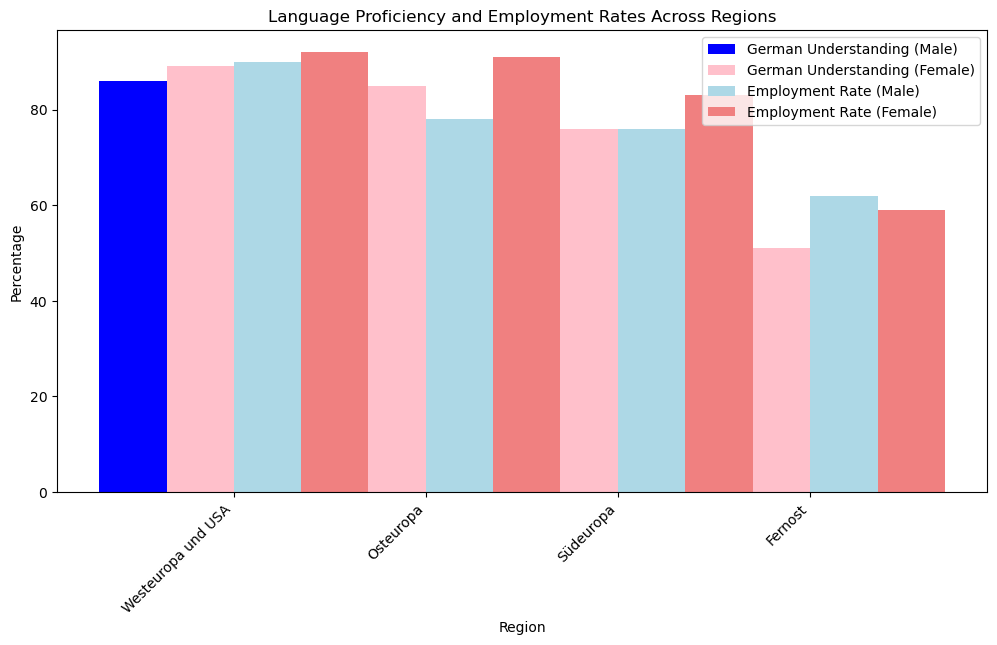

In [220]:
# Assuming you have a DataFrame named 'merged_data' with columns 'Region', 'German_understanding_male', 'German_understanding_female', 'Male', and 'Female'
plt.figure(figsize=(12, 6))

# Grouped bar chart for language proficiency and employment rates
bar_width = 0.35
index = range(len(merged_data['Region']))

plt.bar(index, merged_data['Native_speaker_male'], bar_width, label='German Understanding (Male)', color='blue')
plt.bar([i + bar_width for i in index], merged_data['Native_speaker_female'], bar_width, label='German Understanding (Female)', color='pink')

plt.bar([i + 2 * bar_width for i in index], merged_data['German_understanding_male'], bar_width, label='Employment Rate (Male)', color='lightblue')
plt.bar([i + 3 * bar_width for i in index], merged_data['German_understanding_female'], bar_width, label='Employment Rate (Female)', color='lightcoral')

plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Language Proficiency and Employment Rates Across Regions')
plt.xticks([i + 1.5 * bar_width for i in index], merged_data['Region'], rotation=45, ha='right')
plt.legend()
plt.show()

The heatmap above specifically focuses on the correlation between language proficiency (German understanding) and employment rates. This visualization helps us understand the relationship between language skills and the likelihood of employment among male and female migrants.